In [1]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

mu = 0
  
n0 = 1000000
P0 = 100 
gamma=1
T = 6.5*60
dt=30
N = int(T/dt) + 1
lambda_= 0.0001*np.ones(N)
dt_1 = 10
N_1 = int(T/dt_1) + 1
phi = 1  
sigma = 0.3/np.sqrt(252*(N-1))
sigma_1 = 0.3/np.sqrt(252*(N_1-1))
lambda_1= 0.0001*np.ones(N_1)

#lunch break : 30 min 
lambda_2 = 0.0001*np.ones(N)
lambda_2[5:8]= 0.0002

#lunch break : 10 min
lambda_22 = 0.0001*np.ones(N_1)
lambda_22[15:27]= 0.0002



In [2]:
def optimal_strategy(N,sigma,phi,gamma,lambda_,n0,mu,dt) :
    
    # vector Qt
    Q = np.ones(N)
    Q[N-1] = lambda_[N-1] * gamma * (sigma**2) / (gamma * (sigma**2) + lambda_[N-1])
    for i in reversed(range(N-2)) :
        Q[i] = lambda_[i]- lambda_[i]**2/(lambda_[i] + gamma*sigma**2 + phi*Q[i+1])
    
    # vector qt
    q = np.ones(N)
    q[N-1] = lambda_[N-1] * mu / (gamma*sigma**2 + lambda_[N-1])
    for i in reversed(range(N-2)) :
        q[i] = ((phi*q[i+1] + mu)*lambda_[i])/ (lambda_[i] + gamma * sigma**2 + phi * Q[i+1])
    
    #vector aimt 
    # i+2 or i+1
    aim = np.ones(N-1)
    for i in reversed(range(N-3)) :
        aim[i] = (phi*q[i+2] + mu)/(gamma*sigma**2 + phi*Q[i+2])
    
    #vector taut
    tau = np.zeros(N-1)
    for i in reversed(range(N-3)) :
        tau[i] = (gamma*(sigma**2) + phi*Q[i+1]) / (lambda_[i] + gamma*(sigma**2) + phi*Q[i+1])
    
    #vector n
    n_opt = np.ones(N)
    n_opt[0] = n0
    for i in range(N-1) :
        n_opt[i+1] = (1-tau[i])*n_opt[i] + tau[i]*aim[i]
    
    #tcost
    tcost = np.zeros(N)
    tcost[0]= 0
    for i in range(N-1) :
        tcost[i+1] = tcost[i] + (lambda_[i+1]/2) *(n_opt[i+1] - n_opt[i])**2
    
    result = [n_opt,tcost]
    
    return result
    

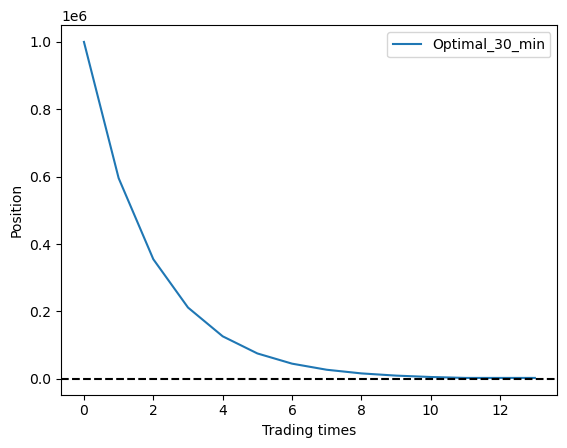

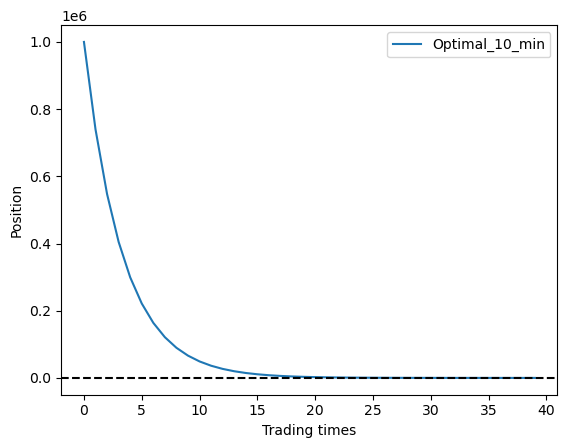

In [3]:
# plot : 30 minutes
t = np.arange(N)
fig, ax = plt.subplots()
ax.plot(t, optimal_strategy(N,sigma,phi,gamma,lambda_,n0,mu,dt)[0], label='Optimal_30_min')
ax.axhline(0, color='k', linestyle='--')
ax.set_xlabel('Trading times')
ax.set_ylabel('Position')
ax.legend()


#plot : 10 minutes
t = np.arange(N_1)
fig, ax = plt.subplots()
ax.plot(t,optimal_strategy(N_1,sigma_1,phi,gamma,lambda_1,n0,mu,dt_1)[0], label='Optimal_10_min')
ax.axhline(0, color='k', linestyle='--')
ax.set_xlabel('Trading times')
ax.set_ylabel('Position')
ax.legend()
plt.show()


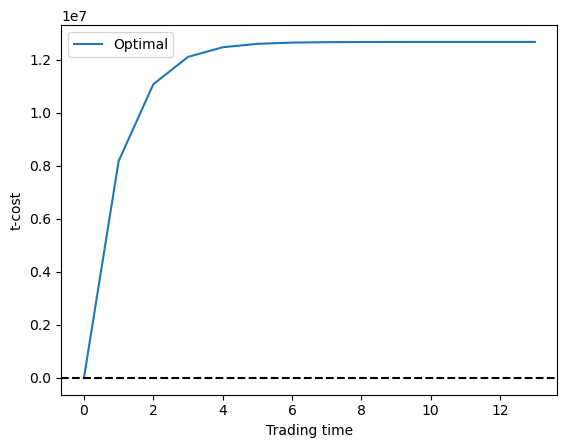

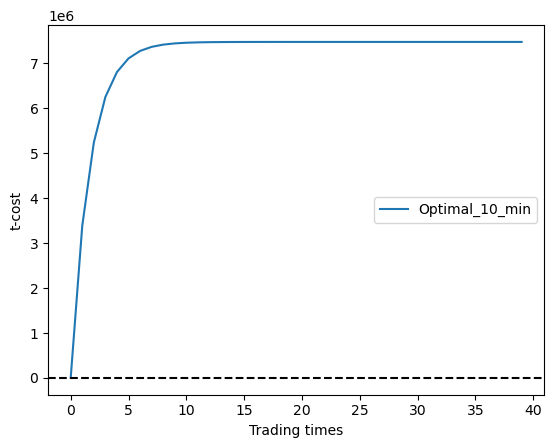

In [4]:
# plot : 30 minute
t = np.arange(N)
fig, ax = plt.subplots()
ax.plot(t, optimal_strategy(N,sigma,phi,gamma,lambda_,n0,mu,dt)[1], label='Optimal')
ax.axhline(0, color='k', linestyle='--')
ax.set_xlabel('Trading time')
ax.set_ylabel('t-cost')
ax.legend()
plt.show()

#plot : 10 minutes
t = np.arange(N_1)
fig, ax = plt.subplots()
ax.plot(t,optimal_strategy(N_1,sigma_1,phi,gamma,lambda_1,n0,mu,dt_1)[1], label='Optimal_10_min')
ax.axhline(0, color='k', linestyle='--')
ax.set_xlabel('Trading times')
ax.set_ylabel('t-cost')
ax.legend()
plt.show()


Setting the price 'drift term' µ to 0 will make the investor want to sell all his shares up to the final date T. This is because there is no future capital gain from keeping them - indeed, the price process implies zero price chance in expectation. In addition, he aims to minimize the risk associated with holding the asset (also achieved by selling).

## (5)

It is not reasonable that when the stock price goes up and down, the optimal strategy doesn't change. We can explain this by the fact that prices are affected by the expected return and some random shocks, which are reflected by the volatility and a random variable epsilon. But, in the objective function, what we want to maximize is expected return minus the fixed cost and minus the risk-aversion term. The price shocks aren't taken into account in the objective function. So the change of price in addition to the return mu won't affect our optimal strategy. 

(If we want to change the optimal trading rule, we should take into account the shocks (random component) in prices.) 

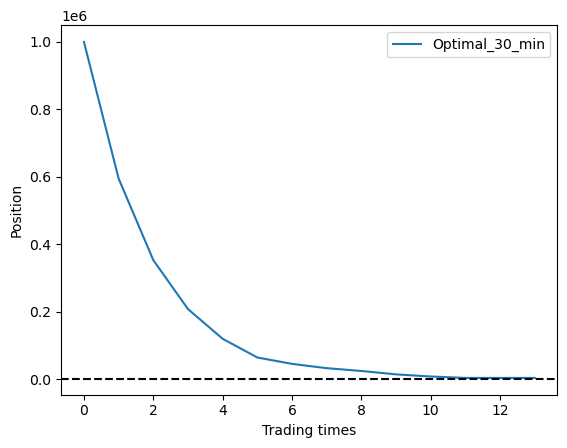

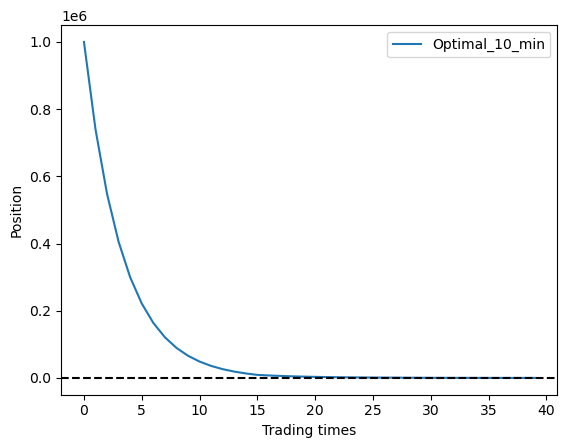

In [5]:
# plot of lunch break

# plot : 30 minutes
t = np.arange(N)
fig, ax = plt.subplots()
ax.plot(t, optimal_strategy(N,sigma,phi,gamma,lambda_2,n0,mu,dt)[0], label='Optimal_30_min')
ax.axhline(0, color='k', linestyle='--')
ax.set_xlabel('Trading times')
ax.set_ylabel('Position')
ax.legend()

#plot : 10 minutes
t = np.arange(N_1)
fig, ax = plt.subplots()
ax.plot(t,optimal_strategy(N_1,sigma_1,phi,gamma,lambda_22,n0,mu,dt_1)[0], label='Optimal_10_min')
ax.axhline(0, color='k', linestyle='--')
ax.set_xlabel('Trading times')
ax.set_ylabel('Position')
ax.legend()
plt.show()



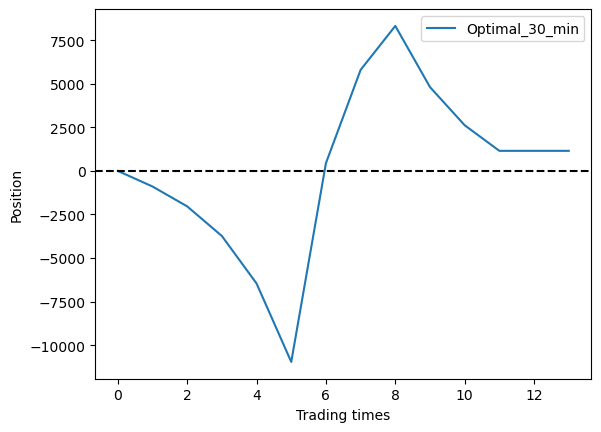

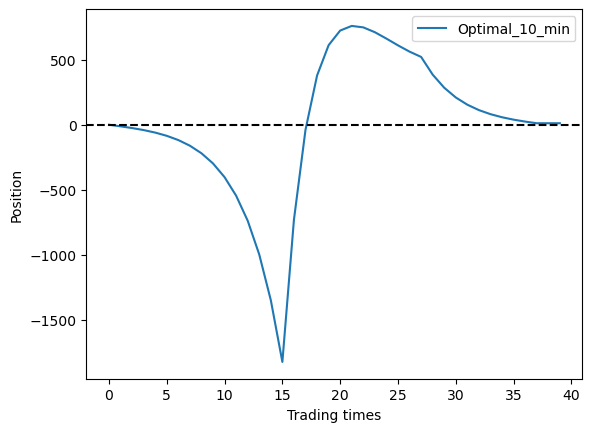

In [6]:
#plot of the difference 

#plot : 30 minutes
t = np.arange(N)
fig, ax = plt.subplots()
ax.plot(t,optimal_strategy(N,sigma,phi,gamma,lambda_2,n0,mu,dt)[0]-optimal_strategy(N,sigma,phi,gamma,lambda_,n0,mu,dt)[0], label='Optimal_30_min')
ax.axhline(0, color='k', linestyle='--')
ax.set_xlabel('Trading times')
ax.set_ylabel('Position')
ax.legend()
plt.show()


#plot : 10 minutes
t = np.arange(N_1)
fig, ax = plt.subplots()
ax.plot(t,optimal_strategy(N_1,sigma_1,phi,gamma,lambda_22,n0,mu,dt_1)[0]-optimal_strategy(N_1,sigma_1,phi,gamma,lambda_1,n0,mu,dt_1)[0], label='Optimal_10_min')
ax.axhline(0, color='k', linestyle='--')
ax.set_xlabel('Trading times')
ax.set_ylabel('Position')
ax.legend()
plt.show()



6. In the case of a 'lunch break', the transaction cost lambda is no longer constant. One approach would be to solve the same recursive model but using a vector lambda, with values that increase to 2bps between 12-2pm.